In [ ]:
import pandas as pd
internal = pd.read_excel('/content/Sauvignon Blanc (Internal Sales).xlsx')
store = pd.read_excel('/content/Store Information.xlsx')
external = pd.read_excel('/content/Sauv Blanc (External Data).xlsx')

In [ ]:
internal.head()

,Category,Store Number,Store State,Item Code,Item Name,Package Type,Vintage,Retail,L52W in Stock,Normalized Sales $ L52W,Sales Bucket
0,Sauvignon Blanc,606,NC,16563,Dog Point Sauvignon Blanc,750ml,2022,22.99,10,239.0,Sales included
1,Sauvignon Blanc,610,NC,16563,Dog Point Sauvignon Blanc,750ml,2022,22.99,10,1294.0,Sales included
2,Sauvignon Blanc,1134,CA,16563,Dog Point Sauvignon Blanc,750ml,2022,24.99,46,53.0,Sales included
3,Sauvignon Blanc,930,FL,16563,Dog Point Sauvignon Blanc,750ml,2022,27.99,52,2813.0,Sales included
4,Sauvignon Blanc,1802,MO,16563,Dog Point Sauvignon Blanc,750ml,2022,25.99,52,1434.0,Sales included


In [ ]:
#Splitting train and test data

internal_train = internal[internal['Sales Bucket'] == 'Sales included']
internal_test = internal[internal['Sales Bucket'] == 'Sales excluded for model test']

In [ ]:
internal_test['Sales Bucket'].value_counts()

Sales excluded for model test    2400
Name: Sales Bucket, dtype: int64

In [ ]:
internal_train['Sales Bucket'].value_counts()

Sales included    21298
Name: Sales Bucket, dtype: int64

In [ ]:
internal_train.describe(include='all')

,Category,Store Number,Store State,Item Code,Item Name,Package Type,Vintage,Retail,L52W in Stock,Normalized Sales $ L52W,Sales Bucket
count,21298,21298.000000,21298,2.129800e+04,21298,21298,21298.0,21296.000000,21298.000000,21298.000000,21298
unique,1,NaN,28,NaN,423,5,20.0,NaN,NaN,NaN,1
top,Sauvignon Blanc,NaN,CA,NaN,Matua Sauvignon Blanc Marlborough,750ml,0.0,NaN,NaN,NaN,Sales included
freq,21298,NaN,3471,NaN,252,21067,14994.0,NaN,NaN,NaN,21298
mean,NaN,1149.414405,NaN,4.531884e+08,NaN,NaN,NaN,18.849952,38.790966,3041.509954,NaN
std,NaN,662.679082,NaN,7.713624e+08,NaN,NaN,NaN,12.858610,16.791046,8194.395397,NaN
min,NaN,101.000000,NaN,1.656300e+04,NaN,NaN,NaN,3.490000,0.000000,0.000000,NaN
25%,NaN,610.000000,NaN,3.617975e+07,NaN,NaN,NaN,11.970000,23.000000,383.000000,NaN
50%,NaN,1014.000000,NaN,1.075738e+08,NaN,NaN,NaN,14.990000,51.000000,1047.500000,NaN
75%,NaN,1603.000000,NaN,2.341178e+08,NaN,NaN,NaN,21.990000,52.000000,2628.000000,NaN


In [ ]:
internal_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21298 entries, 0 to 23697
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Category                 21298 non-null  object 
 1   Store Number             21298 non-null  int64  
 2   Store State              21298 non-null  object 
 3   Item Code                21298 non-null  int64  
 4   Item Name                21298 non-null  object 
 5   Package Type             21298 non-null  object 
 6   Vintage                  21298 non-null  object 
 7   Retail                   21296 non-null  float64
 8   L52W in Stock            21298 non-null  int64  
 9   Normalized Sales $ L52W  21298 non-null  float64
 10  Sales Bucket             21298 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.9+ MB


In [ ]:
internal_train.isnull().sum()

Category                   0
Store Number               0
Store State                0
Item Code                  0
Item Name                  0
Package Type               0
Vintage                    0
Retail                     2
L52W in Stock              0
Normalized Sales $ L52W    0
Sales Bucket               0
dtype: int64

In [ ]:
#Details of rows with missing Retail value

rows_with_missing_retail = internal_train[internal_train['Retail'].isnull()]
rows_with_missing_retail

,Category,Store Number,Store State,Item Code,Item Name,Package Type,Vintage,Retail,L52W in Stock,Normalized Sales $ L52W,Sales Bucket
23587,Sauvignon Blanc,2802,KS,2126251344,La Petite Perriere Sauvignon Blanc,750ml,0,NaN,14,45.0,Sales included
23656,Sauvignon Blanc,2802,KS,2126254390,Emmolo Sauvignon Blanc Club Pack,750ml,0,NaN,7,1135.0,Sales included


In [ ]:
#Imputing the retail value where item code is 2126254390 with the value "$12.99" from the Total Wines website

internal_train.loc[internal_train['Item Code'] == 2126254390, 'Retail'] = 12.99


In [ ]:
# Drop rows with NA values in the 'Retail' column
internal_train.dropna(subset=['Retail'], inplace=True)

<ipython-input-124-47b548569935>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internal_train.dropna(subset=['Retail'], inplace=True)


In [ ]:
# Verify that NA values are removed
print(internal_train.isnull().sum())

Category                   0
Store Number               0
Store State                0
Item Code                  0
Item Name                  0
Package Type               0
Vintage                    0
Retail                     0
L52W in Stock              0
Normalized Sales $ L52W    0
Sales Bucket               0
dtype: int64


In [ ]:
#Show the value counts of each category in the categorical columns

for column in internal_train.columns:
  if internal_train[column].dtype == 'object':  # Check if the column is categorical
    print(f"Value counts for {column}:")
    print(internal_train[column].value_counts())
    print("\n")

Value counts for Category:
Sauvignon Blanc    21297
Name: Category, dtype: int64


Value counts for Store State:
CA    3471
FL    3094
TX    2384
VA    1328
MA    1021
AZ     993
NC     985
MN     952
WA     747
NJ     641
MO     634
IN     494
MI     462
GA     431
SC     413
CO     346
KS     337
NV     321
CT     318
WI     301
LA     298
KY     295
TN     227
MD     215
DE     209
NM     181
NY     162
IL      37
Name: Store State, dtype: int64


Value counts for Item Name:
Matua Sauvignon Blanc Marlborough    252
Oyster Bay Sauvignon Blanc           249
Decoy By Duckhorn Sauvignon Blanc    247
Nobilo Sauvignon Blanc               246
Whitehaven Sauvignon Blanc           245
                                    ... 
EQ Coastal Sauvignon Blanc             1
DANDELIONS SAUV BLANC                  1
Lucky Rock Sauvignon Blanc             1
Esk Valley Marlborough Sauv Blanc      1
Cense Sauvignon Blanc Marlborough      1
Name: Item Name, Length: 422, dtype: int64


Value counts for Pack

In [ ]:
internal_train['is_vintage'] = internal_train['Vintage'].apply(lambda x: 1 if x != 0 else 0)

internal_train['is_vintage'].value_counts()

<ipython-input-125-51300bcd04e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internal_train['is_vintage'] = internal_train['Vintage'].apply(lambda x: 1 if x != 0 else 0)


,count
is_vintage,
0,14993
1,6304


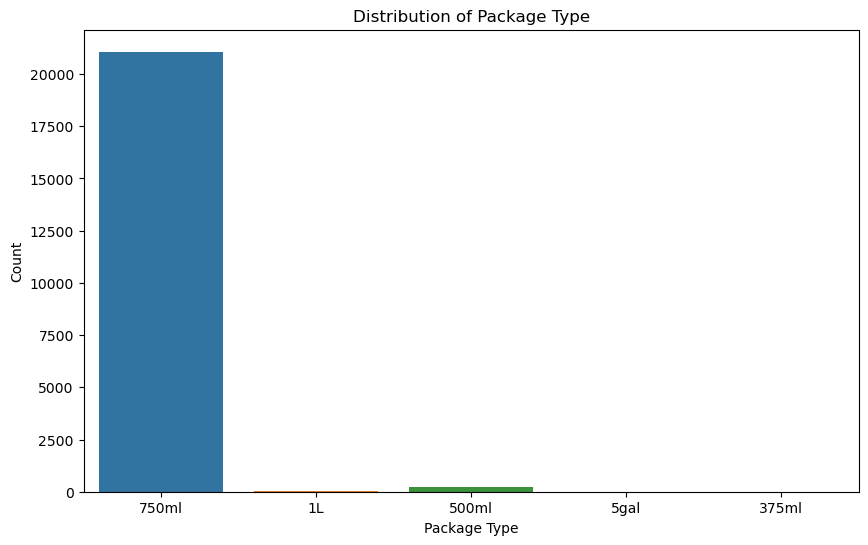

In [ ]:
# Checking for outliers in package type with visualization

import matplotlib.pyplot as plt
import seaborn as sns


# Visualize the distribution of Package Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Package Type', data=internal_train)
plt.title('Distribution of Package Type')
plt.xlabel('Package Type')
plt.ylabel('Count')
plt.show()

In [ ]:
# comparision between Value counts of package type for sales bucket = 'Sales excluded for model test' and sales bucket = 'Sales included'

excluded_sales_package_counts = internal.loc[internal['Sales Bucket'] == 'Sales excluded for model test']['Package Type'].value_counts()
included_sales_package_counts = internal.loc[internal['Sales Bucket'] == 'Sales included']['Package Type'].value_counts()

comparison_df = pd.DataFrame({'Excluded Sales': excluded_sales_package_counts, 'Included Sales': included_sales_package_counts})
comparison_df

,Excluded Sales,Included Sales
1.5L,1.0,NaN
1L,1.0,24.0
375ml,NaN,1.0
500ml,23.0,205.0
5gal,NaN,1.0
750ml,2375.0,21067.0


In [ ]:
# Drop rows with '375ml' and '5gal' package types
internal_train = internal_train[~internal_train['Package Type'].isin(['375ml', '5gal'])]

In [ ]:
store.head()

,State,Store Number,Store Name,Open Date,Price Zone/Market,Store Address,Store Size,Households (HH),% HH Income > $100K,Median HH Income,...,Cabernet Under $20,Cabernet $20-50,Cabernet Over $50,Chardonnay Under $20,Chardonnay Over $20,Wine - Sparkling,Pinot Noir Under $20,Pinot Noir Over $20,Sauvignon Blanc,French Champagne
0,DE,101,101\nDSW,1991-03-01,Delaware,"Northtowne Plaza\n691 Naamans Road\nClaymont, ...",Extra Large,61324,0.391152,78405,...,4,4,4,4,4,4,4,4,4,4
1,DE,102,102\nMSW,1991-07-01,Delaware,Milltown Shopping Center\n1325 McKennans Churc...,Small,61525,0.379764,78074,...,0,0,0,0,0,0,0,0,0,0
2,NJ,301,301\nCHW,1994-11-01,CHW/304,"The Plaza at Cherry Hill\n2100 Route 38, Suite...",Large,106097,0.408202,79937,...,3,4,2,4,2,4,4,3,4,3
3,MD,401,401\nBEW - Beltway,1996-11-01,BEW,"Beltway\n8727 Loch Raven Blvd\nTowson, MD 21286",Medium,120003,0.358491,72889,...,4,3,2,4,3,4,4,2,4,3
4,VA,202,202\nSpringfield,1997-11-01,N Virginia,Tower Shopping Center\n6801 Bland Street\nSpri...,Medium,126019,0.556646,109886,...,3,2,1,2,1,2,3,1,2,2


In [ ]:
# Checking for missing values in store data

store.isnull().sum()

State                                   0
Store Number                            0
Store Name                              0
Open Date                               0
Price Zone/Market                       0
Store Address                           0
Store Size                              0
Households (HH)                         0
% HH Income > $100K                     0
Median HH Income                        0
Average Net Worth                       0
% Population w/ Bachelor's Degree +     0
% Hispanic                              0
% Asian                                 0
% African American                      0
% Population Age 50-70                  0
US Whiskey                             37
Tequila Under $65                      37
Tequila Over $65                       37
Scotch Under $75                       37
Scotch Over $75                        37
Vodka                                  37
Cordials                                0
Brandy Under $85                  

In [ ]:
store.describe(include='all')

C:\Users\rajat\AppData\Local\Temp\ipykernel_1748\1254441215.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  store.describe(include='all')


,State,Store Number,Store Name,Open Date,Price Zone/Market,Store Address,Store Size,Households (HH),% HH Income > $100K,Median HH Income,...,Cabernet Under $20,Cabernet $20-50,Cabernet Over $50,Chardonnay Under $20,Chardonnay Over $20,Wine - Sparkling,Pinot Noir Under $20,Pinot Noir Over $20,Sauvignon Blanc,French Champagne
count,269,269.000000,269,269,269,269,269,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
unique,28,NaN,269,241,68,269,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CA,NaN,101\nDSW,2017-11-16 00:00:00,Orange County,"Northtowne Plaza\n691 Naamans Road\nClaymont, ...",Large,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,43,NaN,1,3,19,1,124,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,1991-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2024-08-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1084.472119,NaN,NaN,NaN,NaN,NaN,99565.988848,0.402032,82920.237918,...,1.992565,2.070632,2.130112,1.944238,2.029740,2.111524,1.918216,2.026022,2.000000,2.044610
std,NaN,626.057425,NaN,NaN,NaN,NaN,NaN,61368.132289,0.125197,24669.774652,...,1.335487,1.298188,1.310756,1.261016,1.365571,1.290977,1.290321,1.358799,1.295803,1.303647
min,NaN,101.000000,NaN,NaN,NaN,NaN,NaN,23355.000000,0.132098,39984.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,602.000000,NaN,NaN,NaN,NaN,NaN,59305.000000,0.305935,64221.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Show the value counts of each category in the categorical columns

for column in store.columns:
  if store[column].dtype == 'object':  # Check if the column is categorical
    print(f"Value counts for {column}:")
    print(store[column].value_counts())
    print("\n")

Value counts for State:
CA    43
FL    39
TX    38
VA    19
NC    15
AZ    14
WA    13
MN    10
MA     8
MO     7
NJ     6
SC     5
MI     5
GA     5
NV     5
IN     5
KY     4
WI     4
LA     4
CT     4
CO     3
NM     3
DE     2
TN     2
MD     2
KS     2
IL     1
NY     1
Name: State, dtype: int64


Value counts for Store Name:
101\nDSW                    1
528\nEuless                 1
219\nReston                 1
1128\nSan Mateo             1
1902\nW. Madison            1
                           ..
1408\nSpokane Valley        1
503\nDel Norte              1
1407\nFederal Way           1
1602\nRoseville             1
617 Charlotte River Gate    1
Name: Store Name, Length: 269, dtype: int64


Value counts for Price Zone/Market:
Orange County      19
Fort Lauderdale    18
Dallas             14
Phoenix            14
San Francisco      13
                   ..
Viera               1
Vancouver           1
Palm Desert         1
Milford             1
Wichita             1
Name: Price Z

In [ ]:
# List of columns to drop from store
cols_to_drop = [
    'US Whiskey', 'Tequila Under $65', 'Tequila Over $65',
    'Scotch Under $75', 'Scotch Over $75', 'Vodka',
    'Cordials', 'Brandy Under $85', 'Brandy Over $85',
    'Cabernet Under $20', 'Cabernet $20-50', 'Cabernet Over $50',
    'Chardonnay Under $20', 'Chardonnay Over $20',
    'Wine - Sparkling', 'Pinot Noir Under $20', 'Pinot Noir Over $20',
    'French Champagne'
]

# Drop columns from store
store = store.drop(columns=cols_to_drop)
store.head()

,State,Store Number,Store Name,Open Date,Price Zone/Market,Store Address,Store Size,Households (HH),% HH Income > $100K,Median HH Income,Average Net Worth,% Population w/ Bachelor's Degree +,% Hispanic,% Asian,% African American,% Population Age 50-70,Sauvignon Blanc
0,DE,101,101\nDSW,1991-03-01,Delaware,"Northtowne Plaza\n691 Naamans Road\nClaymont, ...",Extra Large,61324,0.391152,78405,1328936,0.389185,0.049530,0.055068,0.219067,0.269634,4
1,DE,102,102\nMSW,1991-07-01,Delaware,Milltown Shopping Center\n1325 McKennans Churc...,Small,61525,0.379764,78074,1246506,0.389672,0.143911,0.072431,0.127493,0.265326,0
2,NJ,301,301\nCHW,1994-11-01,CHW/304,"The Plaza at Cherry Hill\n2100 Route 38, Suite...",Large,106097,0.408202,79937,1357225,0.398288,0.202629,0.060986,0.154490,0.258756,4
3,MD,401,401\nBEW - Beltway,1996-11-01,BEW,"Beltway\n8727 Loch Raven Blvd\nTowson, MD 21286",Medium,120003,0.358491,72889,1078772,0.424730,0.046275,0.057204,0.375797,0.243868,4
4,VA,202,202\nSpringfield,1997-11-01,N Virginia,Tower Shopping Center\n6801 Bland Street\nSpri...,Medium,126019,0.556646,109886,1897495,0.544971,0.207948,0.178514,0.157408,0.249248,2


In [ ]:
external.head()

,state,category,item_code,item_name,package_type,vintage,sales_dollars_L52wk,points_of_distribution_L52wk
0,AZ,Sauvignon Blanc,94641750,Kim Crawford Sauvignon Blanc,750ml,0,3778250.223,933.227
1,AZ,Sauvignon Blanc,97672750,Matua Sauvignon Blanc Marlborough,750ml,0,2254833.837,848.073
2,AZ,Sauvignon Blanc,96009750,Oyster Bay Sauvignon Blanc,750ml,2021,1999638.329,922.996
3,AZ,Sauvignon Blanc,131999750,Josh Cellars Sauvignon Blanc,750ml,0,1646664.571,848.169
4,AZ,Sauvignon Blanc,96142750,Whitehaven Sauvignon Blanc,750ml,0,1074172.196,661.709


In [ ]:
# checking for null values in external data

external.isnull().sum()

state                           0
category                        0
item_code                       0
item_name                       0
package_type                    0
vintage                         0
sales_dollars_L52wk             0
points_of_distribution_L52wk    0
dtype: int64

In [ ]:
# Joining external data and store data with internal data

# Merging internal and external data based on common columns 'Item Code' and 'Store State'
merged_data = pd.merge(internal_train, external, left_on=['Item Code', 'Store State'], right_on=['item_code','state'], how='left')

# Merge the merged data with store data based on a common columns 'Store Number' and 'Store State'
final_data = pd.merge(merged_data, store, left_on=['Store Number', 'Store State'], right_on=['Store Number', 'State'], how='left')

# Display the head of the final merged data
final_data.head()

,Category,Store Number,Store State,Item Code,Item Name,Package Type,Vintage,Retail,L52W in Stock,Normalized Sales $ L52W,...,Households (HH),% HH Income > $100K,Median HH Income,Average Net Worth,% Population w/ Bachelor's Degree +,% Hispanic,% Asian,% African American,% Population Age 50-70,Sauvignon Blanc
0,Sauvignon Blanc,606,NC,16563,Dog Point Sauvignon Blanc,750ml,2022,22.99,10,239.0,...,73310,0.373223,74567,940096,0.612601,0.102703,0.106953,0.135563,0.201031,2
1,Sauvignon Blanc,610,NC,16563,Dog Point Sauvignon Blanc,750ml,2022,22.99,10,1294.0,...,61525,0.366193,69655,1049743,0.683316,0.102264,0.117050,0.203035,0.188644,3
2,Sauvignon Blanc,1134,CA,16563,Dog Point Sauvignon Blanc,750ml,2022,24.99,46,53.0,...,71588,0.346092,76455,829497,0.313578,0.347084,0.056348,0.027906,0.231062,1
3,Sauvignon Blanc,930,FL,16563,Dog Point Sauvignon Blanc,750ml,2022,27.99,52,2813.0,...,37403,0.372965,78320,2046003,0.406253,0.195741,0.017650,0.015856,0.290694,3
4,Sauvignon Blanc,1802,MO,16563,Dog Point Sauvignon Blanc,750ml,2022,25.99,52,1434.0,...,140765,0.340113,67711,1073544,0.575152,0.035133,0.052852,0.219364,0.247478,3


In [ ]:
final_data.isnull().sum()

,0
Category,0
Store Number,0
Store State,0
Item Code,0
Item Name,0
Package Type,0
Vintage,0
Retail,0
L52W in Stock,0
Normalized Sales $ L52W,0


In [ ]:
cols_to_remove = [
    'state',
    'category',
    'item_code',
    'item_name',
    'package_type',
    'vintage'
]

# Drop columns from final_data
final_data = final_data.drop(columns=cols_to_remove)
final_data.head()

,Category,Store Number,Store State,Item Code,Item Name,Package Type,Vintage,Retail,L52W in Stock,Normalized Sales $ L52W,...,Households (HH),% HH Income > $100K,Median HH Income,Average Net Worth,% Population w/ Bachelor's Degree +,% Hispanic,% Asian,% African American,% Population Age 50-70,Sauvignon Blanc
0,Sauvignon Blanc,606,NC,16563,Dog Point Sauvignon Blanc,750ml,2022,22.99,10,239.0,...,73310,0.373223,74567,940096,0.612601,0.102703,0.106953,0.135563,0.201031,2
1,Sauvignon Blanc,610,NC,16563,Dog Point Sauvignon Blanc,750ml,2022,22.99,10,1294.0,...,61525,0.366193,69655,1049743,0.683316,0.102264,0.117050,0.203035,0.188644,3
2,Sauvignon Blanc,1134,CA,16563,Dog Point Sauvignon Blanc,750ml,2022,24.99,46,53.0,...,71588,0.346092,76455,829497,0.313578,0.347084,0.056348,0.027906,0.231062,1
3,Sauvignon Blanc,930,FL,16563,Dog Point Sauvignon Blanc,750ml,2022,27.99,52,2813.0,...,37403,0.372965,78320,2046003,0.406253,0.195741,0.017650,0.015856,0.290694,3
4,Sauvignon Blanc,1802,MO,16563,Dog Point Sauvignon Blanc,750ml,2022,25.99,52,1434.0,...,140765,0.340113,67711,1073544,0.575152,0.035133,0.052852,0.219364,0.247478,3


In [ ]:
final_data.isnull().sum()

,0
Category,0
Store Number,0
Store State,0
Item Code,0
Item Name,0
Package Type,0
Vintage,0
Retail,0
L52W in Stock,0
Normalized Sales $ L52W,0


In [ ]:
# Imputing the two columns using different methods
# 1 mean/median imputation

# Define a function for group-based imputation with fallback logic
def impute_with_fallback(df, group_col, target_col, fallback_mapping):
    # Group-based imputation
    df[target_col] = df.groupby(group_col)[target_col].transform(lambda x: x.fillna(x.mean()))

    # Apply fallback for specific states
    for state, fallback_state in fallback_mapping.items():
        fallback_mean = df.loc[df[group_col] == fallback_state, target_col].mean()
        df.loc[df[group_col] == state, target_col] = df.loc[df[group_col] == state, target_col].fillna(fallback_mean)

    return df[target_col]

# Define the fallback mapping: 'DE' uses 'MD', and 'KS' uses 'MO'
fallback_states = {'DE': 'MD', 'KS': 'MO'}

# Apply the imputation with fallback for each column
final_data['sales_dollars_L52wk'] = impute_with_fallback(final_data, 'Store State', 'sales_dollars_L52wk', fallback_states)
final_data['points_of_distribution_L52wk'] = impute_with_fallback(final_data, 'Store State', 'points_of_distribution_L52wk', fallback_states)

# Verify the imputation
print(final_data.loc[final_data['Store State'].isin(['DE', 'KS']), ['Store State', 'sales_dollars_L52wk', 'points_of_distribution_L52wk']])


      Store State  sales_dollars_L52wk  points_of_distribution_L52wk
6              KS        135431.263558                    133.239359
49             DE        206141.054000                    170.610888
65             KS        135431.263558                    133.239359
93             DE        206141.054000                    170.610888
120            DE        206141.054000                    170.610888
...           ...                  ...                           ...
21253          KS        135431.263558                    133.239359
21254          KS        135431.263558                    133.239359
21255          KS        135431.263558                    133.239359
21256          KS        135431.263558                    133.239359
21257          KS        135431.263558                    133.239359

[545 rows x 3 columns]


In [ ]:
# Display all rows with any missing values
rows_with_na = final_data[final_data.isna().any(axis=1)]
print(rows_with_na['Store State'])

Series([], Name: Store State, dtype: object)


In [ ]:
final_data.isnull().sum()

,0
Category,0
Store Number,0
Store State,0
Item Code,0
Item Name,0
Package Type,0
Vintage,0
Retail,0
L52W in Stock,0
Normalized Sales $ L52W,0


In [ ]:
# create a new column with number of days since store has opened


# Convert 'Store Open Date' to datetime objects
store['Open Date'] = pd.to_datetime(store['Open Date'])

# Calculate the number of days since the store opened
today = pd.to_datetime('today')
final_data['Days Since Store Opened'] = (today - final_data['Open Date']).dt.days


In [ ]:
store['Open Date'] = pd.to_datetime(store['Open Date'])

# Calculate the number of years since the store opened
today = pd.to_datetime('today')
final_data['Open Since Years'] = ((today - final_data['Open Date']).dt.days / 365.25).astype(int)

In [ ]:
final_data['Open Since Years'].value_counts()

,count
Open Since Years,
1,1884
7,1882
6,1592
2,1506
8,1339
9,1246
3,1017
10,1007
11,921


In [ ]:
final_data.columns

Index(['Category', 'Store Number', 'Store State', 'Item Code', 'Item Name',
       'Package Type', 'Vintage', 'Retail', 'L52W in Stock',
       'Normalized Sales $ L52W', 'Sales Bucket', 'is_vintage',
       'sales_dollars_L52wk', 'points_of_distribution_L52wk', 'State',
       'Store Name', 'Open Date', 'Price Zone/Market', 'Store Address',
       'Store Size', 'Households (HH)', '% HH Income > $100K',
       'Median HH Income', 'Average Net Worth',
       '% Population w/ Bachelor's Degree +', '% Hispanic', '% Asian',
       '% African American', '% Population Age 50-70', 'Sauvignon Blanc',
       'Open Since Years'],
      dtype='object')

In [ ]:
selected_features = ['Store Number', 'Store State', 'Item Code',
                     'Package Type', 'Vintage', 'Retail', 'L52W in Stock', 'is_vintage',
                     'sales_dollars_L52wk', 'points_of_distribution_L52wk', 'Price Zone/Market',
                     'Store Size', 'Households (HH)', '% HH Income > $100K',
                     'Median HH Income', 'Average Net Worth',
                     "% Population w/ Bachelor's Degree +", '% Hispanic', '% Asian',
                     '% African American', '% Population Age 50-70','Sauvignon Blanc','Open Since Years']

In [ ]:
x = final_data[selected_features]
y = final_data['Normalized Sales $ L52W']

In [ ]:
# Select columns that are categorical
categorical_columns = final_data[selected_features].select_dtypes(include=['object', 'category']).columns

# Display categorical columns
print("Categorical columns:", categorical_columns.tolist())


Categorical columns: ['Store State', 'Package Type', 'Vintage', 'Price Zone/Market', 'Store Size']


In [ ]:
# converting categorical variables to dummies

x = pd.get_dummies(x, columns=['Store State', 'Package Type', 'Vintage', 'Price Zone/Market', 'Store Size'], drop_first=True)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=20)
X_new = selector.fit_transform(x, y)
features = x.columns[selector.get_support()]
print(features)

Index(['Item Code', 'Retail', 'L52W in Stock', 'sales_dollars_L52wk',
       'points_of_distribution_L52wk', 'Average Net Worth',
       '% Population w/ Bachelor's Degree +', '% Hispanic',
       '% Population Age 50-70', 'Sauvignon Blanc', 'Open Since Years',
       'Store State_CA', 'Store State_DE', 'Store State_NY', 'Vintage_2021',
       'Vintage_2022', 'Vintage_2023', 'Price Zone/Market_Delaware',
       'Price Zone/Market_Long Island', 'Price Zone/Market_Orange County'],
      dtype='object')


## Reason behind negative predictions: high skewness of y variable

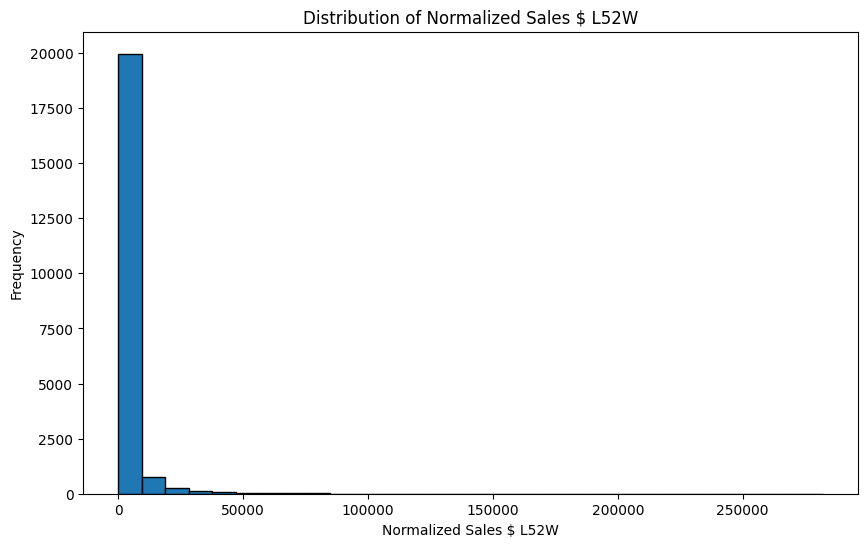

In [ ]:
# create a histogram for distribution of y
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Normalized Sales $ L52W')
plt.xlabel('Normalized Sales $ L52W')
plt.ylabel('Frequency')
plt.show()

In [ ]:
y.skew()

11.52006042808624

In [ ]:
import numpy as np

X = x[features]
y_transformed = np.log1p(y)  # Apply log transformation to the target variable

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

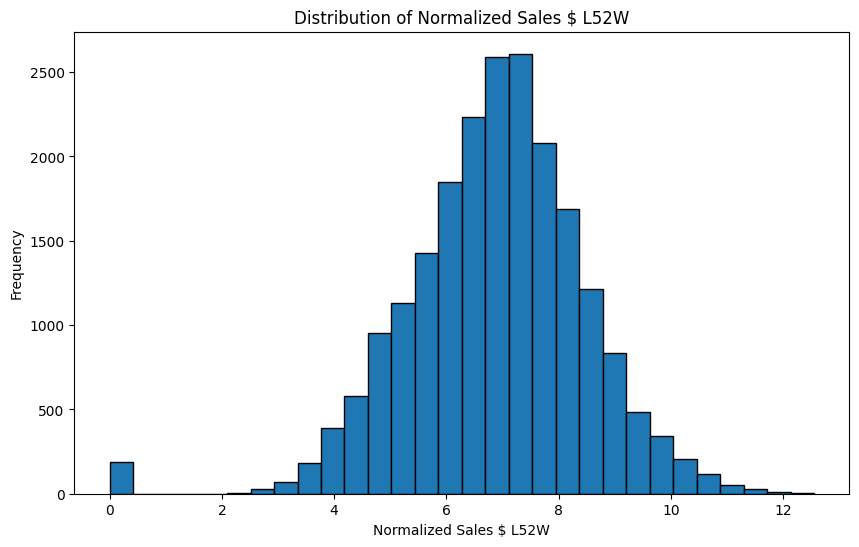

In [ ]:
# After applying log transformation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(y_transformed, bins=30, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Normalized Sales $ L52W')
plt.xlabel('Normalized Sales $ L52W')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Set Global Seed to 1
import numpy as np
np.random.seed(1)

In [ ]:
# random search cv for xgboost while calculating rmse, mae and r2

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [3, 5, 7, 9, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.1, 0.3, 0.5],
    'alpha': [5,10,15,20]

}

# Create an XGBoost regressor model
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    refit='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)


# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Get the best model from the random search
best_model = random_search.best_estimator_

# Make predictions on the validation data
y_pred_xgb = best_model.predict(X_valid)

# Calculate the RMSE
rmse_xgb = np.sqrt(mean_squared_error(np.expm1(y_valid), np.expm1(y_pred_xgb)))
print(f"XGBoost Best RMSE: {rmse_xgb}")

# Calculate the MAE
mae_xgb = mean_absolute_error(np.expm1(y_valid), np.expm1(y_pred_xgb))
print(f"XGBoost Best MAE: {mae_xgb}")

# Calculate the R-squared
r2_xgb = r2_score(np.expm1(y_valid), np.expm1(y_pred_xgb))
print(f"XGBoost Best R-squared: {r2_xgb}")

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
XGBoost Best RMSE: 3464.040702453907
XGBoost Best MAE: 1221.8847888518833
XGBoost Best R-squared: 0.8165712547106043
Best parameters found:  {'subsample': 0.9, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.5, 'alpha': 5}


In [ ]:
# create and fit an xgboost regressor model and calculate rmse and r2 values

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Create an XGBoost regressor model
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror',
                             subsample = 0.9,
                             n_estimators = 500,
                             max_depth = 5,
                             learning_rate = 0.1,
                             colsample_bytree = 0.5,
                             alpha = 5)

# Fit the model to the training data
model_xgb.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_xgb = model_xgb.predict(X_valid)

# Apply inverse log transformation
#y_pred_inverse = np.expm1(y_pred_xgb)

# Calculate the RMSE
rmse_xgb = np.sqrt(mean_squared_error(np.expm1(y_valid), np.expm1(y_pred_xgb)))
print(f"XGBoost RMSE: {rmse_xgb}")

# Calculate the MAE
mae_xgb = mean_absolute_error(np.expm1(y_valid), np.expm1(y_pred_xgb))
print(f"XGBoost MAE: {mae_xgb}")

# Calculate the R-squared
r2_xgb = r2_score(np.expm1(y_valid), np.expm1(y_pred_xgb))
print(f"XGBoost R-squared: {r2_xgb}")

XGBoost RMSE: 3464.040702453907
XGBoost MAE: 1221.8847888518833
XGBoost R-squared: 0.8165712547106043


# Test Data Preprocessing

In [ ]:
internal_test.isnull().sum()

,0
Category,0
Store Number,0
Store State,0
Item Code,0
Item Name,0
Package Type,0
Vintage,0
Retail,0
L52W in Stock,0
Normalized Sales $ L52W,2400


In [ ]:
# creating column is_vintage in test data
internal_test['is_vintage'] = internal_test['Vintage'].apply(lambda x: 1 if x != 0 else 0)

internal_test['is_vintage'].value_counts()

<ipython-input-152-eae77a8b1b81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internal_test['is_vintage'] = internal_test['Vintage'].apply(lambda x: 1 if x != 0 else 0)


,count
is_vintage,
0,1680
1,720


In [ ]:
# Joining external data and store data with internal data

# Merging internal and external data based on common columns 'Item Code' and 'Store State'
merged_data_test = pd.merge(internal_test, external, left_on=['Item Code', 'Store State'], right_on=['item_code','state'], how='left')

# Merge the merged data with store data based on a common columns 'Store Number' and 'Store State'
final_data_test = pd.merge(merged_data_test, store, left_on=['Store Number', 'Store State'], right_on=['Store Number', 'State'], how='left')

# Display the head of the final merged data
final_data_test.head()

,Category,Store Number,Store State,Item Code,Item Name,Package Type,Vintage,Retail,L52W in Stock,Normalized Sales $ L52W,...,Households (HH),% HH Income > $100K,Median HH Income,Average Net Worth,% Population w/ Bachelor's Degree +,% Hispanic,% Asian,% African American,% Population Age 50-70,Sauvignon Blanc
0,Sauvignon Blanc,508,TX,16563,Dog Point Sauvignon Blanc,750ml,2022,22.99,52,NaN,...,119670,0.285126,64221,695923,0.304787,0.315273,0.088164,0.231825,0.213277,0
1,Sauvignon Blanc,1110,CA,16563,Dog Point Sauvignon Blanc,750ml,2022,19.99,52,NaN,...,117011,0.557819,110086,1774066,0.536844,0.210937,0.164004,0.019073,0.263092,2
2,Sauvignon Blanc,1501,CT,16563,Dog Point Sauvignon Blanc,750ml,2022,26.99,9,NaN,...,53733,0.555152,114356,2416222,0.572072,0.209061,0.056963,0.107892,0.267653,4
3,Sauvignon Blanc,801,GA,16563,Dog Point Sauvignon Blanc,750ml,2022,23.99,8,NaN,...,79012,0.539817,107097,1777722,0.630375,0.119414,0.150019,0.138577,0.244459,4
4,Sauvignon Blanc,2302,CO,16563,Dog Point Sauvignon Blanc,750ml,2022,25.99,52,NaN,...,89577,0.570291,111081,1897933,0.660241,0.086944,0.084917,0.026440,0.251252,4


In [ ]:
final_data_test.isnull().sum()

,0
Category,0
Store Number,0
Store State,0
Item Code,0
Item Name,0
Package Type,0
Vintage,0
Retail,0
L52W in Stock,0
Normalized Sales $ L52W,2400


In [ ]:
cols_to_remove_test = [
    'state',
    'category',
    'item_code',
    'item_name',
    'package_type',
    'vintage'
]

# Drop columns from final_data_test
final_data_test = final_data_test.drop(columns=cols_to_remove_test)
final_data_test.head()

,Category,Store Number,Store State,Item Code,Item Name,Package Type,Vintage,Retail,L52W in Stock,Normalized Sales $ L52W,...,Households (HH),% HH Income > $100K,Median HH Income,Average Net Worth,% Population w/ Bachelor's Degree +,% Hispanic,% Asian,% African American,% Population Age 50-70,Sauvignon Blanc
0,Sauvignon Blanc,508,TX,16563,Dog Point Sauvignon Blanc,750ml,2022,22.99,52,NaN,...,119670,0.285126,64221,695923,0.304787,0.315273,0.088164,0.231825,0.213277,0
1,Sauvignon Blanc,1110,CA,16563,Dog Point Sauvignon Blanc,750ml,2022,19.99,52,NaN,...,117011,0.557819,110086,1774066,0.536844,0.210937,0.164004,0.019073,0.263092,2
2,Sauvignon Blanc,1501,CT,16563,Dog Point Sauvignon Blanc,750ml,2022,26.99,9,NaN,...,53733,0.555152,114356,2416222,0.572072,0.209061,0.056963,0.107892,0.267653,4
3,Sauvignon Blanc,801,GA,16563,Dog Point Sauvignon Blanc,750ml,2022,23.99,8,NaN,...,79012,0.539817,107097,1777722,0.630375,0.119414,0.150019,0.138577,0.244459,4
4,Sauvignon Blanc,2302,CO,16563,Dog Point Sauvignon Blanc,750ml,2022,25.99,52,NaN,...,89577,0.570291,111081,1897933,0.660241,0.086944,0.084917,0.026440,0.251252,4


In [ ]:
final_data_test.isnull().sum()

,0
Category,0
Store Number,0
Store State,0
Item Code,0
Item Name,0
Package Type,0
Vintage,0
Retail,0
L52W in Stock,0
Normalized Sales $ L52W,2400


In [ ]:

# mean/median imputation

def impute_with_fallback(df, group_col, target_col, fallback_mapping):
    # Group-based imputation
    df[target_col] = df.groupby(group_col)[target_col].transform(lambda x: x.fillna(x.mean()))

    # Apply fallback for specific states
    for state, fallback_state in fallback_mapping.items():
        fallback_mean = df.loc[df[group_col] == fallback_state, target_col].mean()
        df.loc[df[group_col] == state, target_col] = df.loc[df[group_col] == state, target_col].fillna(fallback_mean)

    return df[target_col]

# Define the fallback mapping: 'DE' uses 'MD', and 'KS' uses 'MO'
fallback_states = {'DE': 'MD', 'KS': 'MO'}

# Apply the imputation with fallback for each column
final_data_test['sales_dollars_L52wk'] = impute_with_fallback(final_data_test, 'Store State', 'sales_dollars_L52wk', fallback_states)
final_data_test['points_of_distribution_L52wk'] = impute_with_fallback(final_data_test, 'Store State', 'points_of_distribution_L52wk', fallback_states)

# Verify the imputation
print(final_data_test.loc[final_data_test['Store State'].isin(['DE', 'KS']), ['Store State', 'sales_dollars_L52wk', 'points_of_distribution_L52wk']])


     Store State  sales_dollars_L52wk  points_of_distribution_L52wk
9             KS        200465.376000                    157.807219
50            KS        200465.376000                    157.807219
179           KS        200465.376000                    157.807219
199           DE        377371.135615                    203.221154
267           DE        377371.135615                    203.221154
339           DE        377371.135615                    203.221154
485           KS        200465.376000                    157.807219
490           KS        200465.376000                    157.807219
524           DE        377371.135615                    203.221154
529           DE        377371.135615                    203.221154
592           DE        377371.135615                    203.221154
593           KS        200465.376000                    157.807219
677           KS        200465.376000                    157.807219
699           KS        200465.376000           

In [ ]:
final_data_test.isnull().sum()

,0
Category,0
Store Number,0
Store State,0
Item Code,0
Item Name,0
Package Type,0
Vintage,0
Retail,0
L52W in Stock,0
Normalized Sales $ L52W,2400


In [ ]:
# create a new column with number of days since store has opened


# Convert 'Store Open Date' to datetime objects
store['Open Date'] = pd.to_datetime(store['Open Date'])

# Calculate the number of days since the store opened
today = pd.to_datetime('today')
final_data_test['Days Since Store Opened'] = (today - final_data_test['Open Date']).dt.days


In [ ]:
store['Open Date'] = pd.to_datetime(store['Open Date'])

# Calculate the number of years since the store opened
today = pd.to_datetime('today')
final_data_test['Open Since Years'] = ((today - final_data_test['Open Date']).dt.days / 365.25).astype(int)

In [ ]:
final_data_test.columns

Index(['Category', 'Store Number', 'Store State', 'Item Code', 'Item Name',
       'Package Type', 'Vintage', 'Retail', 'L52W in Stock',
       'Normalized Sales $ L52W', 'Sales Bucket', 'is_vintage',
       'sales_dollars_L52wk', 'points_of_distribution_L52wk', 'State',
       'Store Name', 'Open Date', 'Price Zone/Market', 'Store Address',
       'Store Size', 'Households (HH)', '% HH Income > $100K',
       'Median HH Income', 'Average Net Worth',
       '% Population w/ Bachelor's Degree +', '% Hispanic', '% Asian',
       '% African American', '% Population Age 50-70', 'Sauvignon Blanc',
       'Open Since Years'],
      dtype='object')

In [ ]:
selected_features = ['Store Number', 'Store State', 'Item Code',
                     'Package Type', 'Vintage', 'Retail', 'L52W in Stock', 'is_vintage',
                     'sales_dollars_L52wk', 'points_of_distribution_L52wk', 'Price Zone/Market',
                     'Store Size', 'Households (HH)', '% HH Income > $100K',
                     'Median HH Income', 'Average Net Worth',
                     "% Population w/ Bachelor's Degree +", '% Hispanic', '% Asian',
                     '% African American', '% Population Age 50-70','Sauvignon Blanc','Open Since Years']

# Select columns that are categorical
categorical_columns = final_data_test[selected_features].select_dtypes(include=['object', 'category']).columns

# Display categorical columns
print("Categorical columns:", categorical_columns.tolist())

Categorical columns: ['Store State', 'Package Type', 'Vintage', 'Price Zone/Market', 'Store Size']


In [ ]:
x_test = final_data_test[selected_features]
x_test = pd.get_dummies(x_test, columns=['Store State', 'Package Type', 'Vintage', 'Price Zone/Market', 'Store Size'], drop_first=True)

In [ ]:
X_test = x_test[features]

## We have to train the final model on the entire dataset (train + valid) before making predictions on the test data

In [ ]:
# Create an XGBoost regressor model for test data
model_xgb_test = xgb.XGBRegressor(objective ='reg:squarederror',
                             subsample = 0.9,
                             n_estimators = 500,
                             max_depth = 5,
                             learning_rate = 0.1,
                             colsample_bytree = 0.5,
                             alpha = 5)

# Fit the model to the full data (train + valid)
model_xgb_test.fit(X, y_transformed)

XGBRegressor(alpha=5, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
# Make predictions on the test set
y_pred_final = model_xgb_test.predict(X_test)

y_pred_final_inv = np.expm1(y_pred_final)

# Prepare the DataFrame with the required template columns
# Assuming X_test has the relevant columns 'Category', 'Store #', and 'Item Code'
output_df = pd.DataFrame({
    'Category': final_data_test['Category'],        # Category column from X_test
    'Store #': final_data_test['Store Number'],          # Store # column from X_test
    'Item Code': final_data_test['Item Code'],      # Item Code column from X_test
    '$ Forecast': y_pred_final_inv                   # Predictions
})

# Save to Excel
output_df.to_excel("sales_forecast_output.xlsx", index=False)


In [ ]:
output_df.head()

,Category,Store #,Item Code,$ Forecast
0,Sauvignon Blanc,508,16563,522.120789
1,Sauvignon Blanc,1110,16563,1180.516968
2,Sauvignon Blanc,1501,16563,728.075195
3,Sauvignon Blanc,801,16563,495.771362
4,Sauvignon Blanc,2302,16563,1395.157227


In [ ]:
# check if there are any negative values in "$ Forecast" column in output_df

negative_values = output_df[output_df['$ Forecast'] < 0]
negative_values

,Category,Store #,Item Code,$ Forecast
